# Getting Started with SQLite
SQLite provides a quick way to setup a database engine without requiring a server. It's essentially a flat file, but with most of the major capabilities of an SQL database. You can compare SQLite databases to a CSV or Excel file: each SQLite database can have one or more tables with columns and rows, and it is stored as a file on your computer. The key difference between SQLite databases and a CSV or Excel file is that we can write queries for it.
#### SQLite Advantages
* *It's local.* - One of the core advantages of SQLite is that it allows you to create databases locally on your computer to support testing and easy prototyping. This is beneficial, because if you want to test something out and you need a database, it's not always the most convenient to set up a SQL database server just to try something out.
* *There's an app for that.* -  Another advantage of SQLite databases are that they can be used on a mobile phone app. Most mobile phone games will use an SQLite database to store certain information about you or your players statistics.
#### SQLite Disadvantages
* *It's local.* -  If you've used a MYSQL database before, you might have noticed that you can have multiple users access the database. With SQLite, there are no users. SQL is local: stored on one computer or phone. So, only that computer or phone will have access.
* *There are fewer security features:*  -  one other disadvantage to be aware of is that SQLite doesn't have as many security features as a traditional SQL database.

# Import Dependencies

#### Matplotlib Dependencies
Import is Matplotlib, as we'll need to graph the results of our analysis to show investors. Matplotlib's dependency contains code that allows you to plot data. There are many different kinds of plots you can create; for this project, we'll use the "fivethirtyeight" style. This style essentially tries to replicate the style of the graphs from FiveThirtyEight.com. 

In [1]:
%matplotlib inline
# import style from Matplotlib
from matplotlib import style
# add the specific style we want, fivethirtyeight
style.use('fivethirtyeight')
# add the pyplot module, a dependency that provides us with a MATLAB-like plotting framework
import matplotlib.pyplot as plt

#### NumPy and Pandas Dependencies

In [2]:
import pandas as pd 
import numpy as np

#### Datetime Dependencies
Use datetime in this module because we'll need to calculate some data points that have to do with dates. 

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

##### Import SQLAlchemy Dependencies
We know we want to query a SQLite database, and SQLAlchemy is the best tool to do that. We can start by adding the SQLAlchemy dependency, but then we will also add the dependencies for automap, session, create_engine, and func.
* *Object Relational Mapper(ORM)* -  allows you to create classes in your code that can be mapped to specific tables in a given database. This allows us to create a special type of system called a decoupled system. Generally speaking, the less coupling in our code, the better. If there are a bunch of relationships between all of your coding components and one of them breaks, everything breaks. Generally speaking, the less coupling in our code, the better. If there are a bunch of relationships between all of your coding components and one of them breaks, everything breaks.

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy #sql alchemy is used to create queries for every flavor of sql databases
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session # Object Relational Mapper(ORM) allows you to create classes in your code that can be mapped to specific tables in a given database. This allows us to create a special type of system called a decoupled system.
from sqlalchemy import create_engine, func 

##### SQLAlchemy Create Engine
The create enging function'sprimary purpose is to set up the ability to query a SQLite database. After all, data just sitting in a database that we can't access does us no good. In order to connect to our SQLite database, we need to use the create_engine() function. This function doesn't actually connect to our database; it just prepares the database file to be connected to later on.This function will typically have one parameter, which is the location of the SQLite database file.

In [5]:
# Database Setup
engine = create_engine("sqlite:///hawaii.sqlite") # use the create_engine() function to connect to our database

##### SQLAlchemy Automap Base
* Automap Base creates a base class for an automap schema in SQLAlchemy. Basically, it sets up a foundation for us to build on in SQLAlchemy, and by adding it to our code, it will help the rest of our code to function properly.

In [6]:
# reflect an existing database into a new model
Base = automap_base()

##### SQLAlchemy Reflect Tables
*Reflect Tables* - Now that we've gotten our environment set up for SQLAlchemy, we can reflect our tables with the prepare() function. By adding this code, we'll reflect the schema of our SQLite tables into our code and create mappings.
* IMPORTANT - Remember when we talked about keeping our code decoupled? When we reflect tables, we create classes that help keep our code separate. This ensures that our code is separated such that if other classes or systems want to interact with it, they can interact with only specific subsets of data instead of the whole dataset.

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

##### View Classes Found by Automap
Once we have added the base.prepare() function, we should confirm that the Automap was able to find all of the data in the SQLite database. We will double-check this by using Base.classes.keys(). This code references the classes that were mapped in each table.
* *Base.classes* gives us access to all the classes.
* *keys()* references all the names of the classes.

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

##### Save References to Each Table
In order to reference a specific class, we use Base.classes.<class name>. For example, if we wanted to reference the station class, we would use Base.classes.station.

Since it can be rather cumbersome to type Base.classes every time we want to reference the measurement or station classes, we can give the classes new variable names. In this case, we will create new references for our Measurement class and Station class. Add these new variables to your code:

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

##### Create Session Link to the Database
Let's create a session link to our database with our code. First, we'll use an SQLAlchemy Session to query our database. Our session essentially allows us to query for data.

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Query data and precipitation columns
results = session.query(Measurement.date, Measurement.prcp).all()

In [12]:
# Print out results
    # Use a for loop to check if data ran
# for result in results: 
#     print(result)

# Exploratory Climate Analysis

### Retrieve the Precipitation Data
#### Find the Date One Year Ago

In [13]:
# Calculate the date one year from the last date in data set.
    #Calculate the date one year from the last date in data set. 
prev_year = dt.date(2017, 8, 23) #This code specifies the most recent date
# Calculate the date one year from the last date in data set.
    #add the dt.timedelta() function to the previous line of code. This function allows us to trace back a certain number of days.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)    

#### Retrieve the Precipitation Scores

In [14]:
# Create a variable to store the results of the query
results = []

In [20]:
# Perform a query to retrieve the data and precipitation scores
    # session.query() function for this query will take two parameters. We will reference the Measurement table using Measurement.date and Measurement.prcp
    # use the filter() function to filter out the data we don't need.
    # add .all() to the end of our existing query, which extracts all of the results from our query and put them in a list. 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()    

# print(results)

### Save Query Results
We have our weather results saved in a variable. In order to access it in the future, we'll save it to a Python Pandas DataFrame. We need to provide our results variable as one parameter and specify the column names as our second parameter. To do this, we'll add the following line to our code:

In [22]:
# Save the query results as a Pandas DataFrame
df = pd.DataFrame(results, columns=['date', 'precipitation'])

### Use the set_index() Function
The first column is auto-generated and contains the row number. However, we want the index column to be the date column, so we'll need to get rid of those row numbers. To do this, set the index to the date column. This will make the date column the first column. We can use the variable inplace to specify whether or not we want to create a new DataFrame.

In [24]:
# Set the index to the date column
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


Our DataFrame looks good. However, because we are using the date as the index, the DataFrame has two date columns, which is confusing. So we'll print the DataFrame without the index so we can see just the date and precipitation. For this task, we'll need to use a slightly different print statement. First we'll convert the DataFrame to strings, and then we'll set our index to "False." This will allow us to print the DataFrame without the index

In [26]:
# Convert the DataFrame to strings, and then we'll set our index to "False." This will allow us to print the DataFrame without the index
# print(df.to_string(index=False))

### Sort the DataFrame
We're going to sort the values by date using the sort_index() function. Since we set our index to the date column previously, we can use our new index to sort our results. 

In [28]:
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))

### Plot the Data

<AxesSubplot:xlabel='date'>

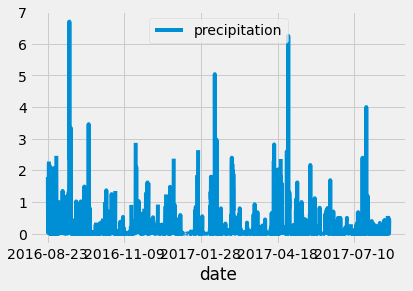

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

Along the x-axis are the dates from our dataset, and the y-axis is the total amount of precipitation for each day. While this data shows all of the station observations, we are interested in determining weather trends. One trend we can observe based on this plot is that some months have higher amounts of precipitation than others

### Generate the Summary

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data using describe() function
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge